In [5]:
# Useful libraries
import numpy as np
import pandas as pd
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
import sympy as sym

# will import the function delta_prime_solver as f
import tm_solver.solver as solver
f = solver.delta_prime_solver

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


$\textbf{Fixed}$ $r_{0}$ $\textbf{and we scan}$ $q_{0}$

In [2]:
# Global parameters
T = 5 # ratio between the toroidal component and the major radius (see the def of q)
m = 2 # number of poloidal Fourier modes
n = 1 # number of toroidal Fourier modes
r_0 = 0.8164965809277261

In [3]:
# Creating the q_0 coeff as string in order to use delta_prime_solver() for each one
q_0_list = np.linspace(0.9, 1.6, 20)
q_0_list_str = [str(num) for num in q_0_list]

constructing $q(r) = q_{0}\left[1+\left(\frac{r}{r_{0}}\right)^{2}\right]$ with fixed $r_{0}$ and by scanning $q_{0}$

In [4]:
# Creating all q profile with the q_0s
q_profile_str_q_0 = []

for i in range(len(q_0_list_str)):
    q_profile_str_q_0.append(q_0_list_str[i]+'*(1+(r/0.81)**2)')

In [6]:
# Computing the delta_prime for each q profile
delta_primes_q_0 = []

for i in range(len(q_profile_str_q_0)):
    delta_primes_q_0.append(f(T, m, n, q_profile_str_q_0[i]))

In [7]:
# We convert into array in order to multiply it by r_0 in the below plot
delta_primes_q_0 = np.array(delta_primes_q_0)

(-15.0, 18.0)

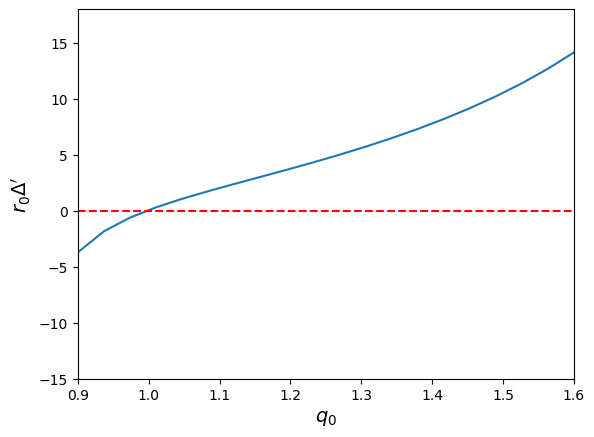

In [8]:
# Plotting the delta_prime*r_0 (bc it's unitless) as a function of q_0
plt.plot(q_0_list, delta_primes_q_0*r_0)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel(r'$q_{0}$', fontsize=14)
plt.ylabel(r"$r_{0}\Delta'$", fontsize=14)
plt.xlim(0.9, 1.6)
plt.ylim(-15, 18)